

---



<center>
  <b><font size="+3">IPL Match Outcome Prediction</font></b>
</center>




---



# (1) Importing the necessary libraries for the following :
- File uploads
- Data manipulation
- Data splitting
- Preprocessing
- Model building
- Accuracy evaluation.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D, Dense
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files



---



# (2) Uploading and reading the dataset :
- Uploading the csv file and then loading it into a dataframe.
- Displaying the first few rows.

In [ ]:
uploaded = files.upload()
df = pd.read_csv('Player_match.csv', low_memory=False, encoding='latin-1')
df.head()

Saving Player_match.csv to Player_match.csv


,Player_match_SK,PlayerMatch_key,Match_Id,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name,Role_Desc,...,Season_year,is_manofThematch,Age_As_on_match,IsPlayers_Team_won,Batting_Status,Bowling_Status,Player_Captain,Opposit_captain,Player_keeper,Opposit_keeper
0,-1,-1.000000e+00,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12694,3.359870e+10,335987,6,R Dravid,1/11/1973,Right-hand bat,Right-arm offbreak,India,Captain,...,2008.0,0.0,35.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
2,12695,3.359870e+10,335987,7,W Jaffer,2/16/1978,Right-hand bat,Right-arm offbreak,India,Player,...,2008.0,0.0,30.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
3,12696,3.359870e+10,335987,8,V Kohli,11/5/1988,Right-hand bat,Right-arm medium,India,Player,...,2008.0,0.0,20.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
4,12697,3.359870e+10,335987,9,JH Kallis,10/16/1975,Right-hand bat,Right-arm fast-medium,South Africa,Player,...,2008.0,0.0,33.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha




---



# (3) Pre-processing the dataset.
1.   **Dropping irrelevant rows and columns** that do not contribute to the model.
2.  **Encoding categorical variables**
3. **Defining features and target**
4. **Splitting the data** into train data and test data in the 8:2 ratio.
5. **Standardising the dataset**: After this step, the features will have a mean of 0 and a standard deviation of 1.






In [ ]:
# Dropping the irrelevant row
df = df[1:]

# Drop irrelevant columns
df_clean = df.drop(['Player_Id', 'DOB', 'PlayerMatch_key', 'Batting_Status', 'Bowling_Status', 'Country_Name', 'Match_Id', 'Player_match_SK', 'is_manofThematch','Season_year'], axis=1)

# Encode categorical variables
label_encoders = {}
for column in ['Batting_hand', 'Player_Name', 'Bowling_skill', 'Role_Desc', 'Player_team', 'Opposit_Team',
               'Player_Captain', 'Opposit_captain', 'Player_keeper', 'Opposit_keeper']:
    le = LabelEncoder()
    df_clean[column] = le.fit_transform(df_clean[column].astype(str))
    label_encoders[column] = le  # Store encoders for later use

# Display cleaned data
print(df_clean.head())


   Player_Name  Batting_hand  Bowling_skill  Role_Desc  Player_team  \
1          331             1             12          0           11   
2          479             1             12          3           11   
3          467             1              9          3           11   
4          186             1              8          3           11   
5          101             1              5          3           11   

   Opposit_Team  Age_As_on_match  IsPlayers_Team_won  Player_Captain  \
1             6             35.0                 0.0              28   
2             6             30.0                 0.0              28   
3             6             20.0                 0.0              28   
4             6             33.0                 0.0              28   
5             6             25.0                 0.0              28   

   Opposit_captain  Player_keeper  Opposit_keeper  
1               32             28              44  
2               32             28   

In [ ]:
value_counts = print(df_clean['IsPlayers_Team_won'].value_counts())


IsPlayers_Team_won
0.0    7040
1.0    6952
Name: count, dtype: int64


<ipython-input-6-f24894452bfb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


Text(0, 0.5, 'Count')

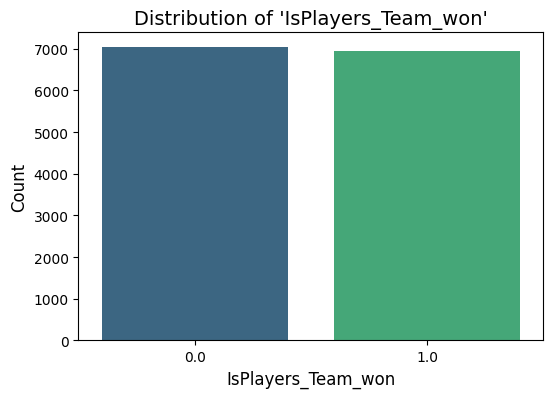

In [ ]:
# Calculate the value counts and store them in the value_counts variable
value_counts = df_clean['IsPlayers_Team_won'].value_counts()

# Plot the value counts as a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

# Add labels and title
plt.title("Distribution of 'IsPlayers_Team_won'", fontsize=14)
plt.xlabel("IsPlayers_Team_won", fontsize=12)
plt.ylabel("Count", fontsize=12)

In [ ]:
# Separating the features and the target

# X: All columns except the 11th column (index 10)
X = df_clean.drop(df_clean.columns[7], axis=1)  # Drop the 11th column (index 10) for features

# y: The 11th column (index 10) as target
y = df_clean.iloc[:, 7]  # Select the 11th column as the target

In [ ]:
# Check the shape of X and y
print("Shape of X (features):", X.shape)  # X should have (n_samples, 14)
print("Shape of y (target):", y.shape)    # y should have (n_samples,)

# Check the first few rows of X and y
print("\nFirst 5 rows of X (features):")
print(X.head())  # Display first 5 rows of features

print("\nFirst 5 values of y (target):")
print(y.head())  # Display first 5 rows of target


Shape of X (features): (13992, 11)
Shape of y (target): (13992,)

First 5 rows of X (features):
   Player_Name  Batting_hand  Bowling_skill  Role_Desc  Player_team  \
1          331             1             12          0           11   
2          479             1             12          3           11   
3          467             1              9          3           11   
4          186             1              8          3           11   
5          101             1              5          3           11   

   Opposit_Team  Age_As_on_match  Player_Captain  Opposit_captain  \
1             6             35.0              28               32   
2             6             30.0              28               32   
3             6             20.0              28               32   
4             6             33.0              28               32   
5             6             25.0              28               32   

   Player_keeper  Opposit_keeper  
1             28           

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Displaying the preprocessed features and target
print("Processed features data: \n", X_train_scaled[:5, :]) # Prints the first 5 rows of the array
print("Processed target data: \n", X_test_scaled[:5, :]) # Prints the first 5 rows of the array

Processed features data: 
 [[-0.43596062  0.5426987  -2.38796901  0.39166883  0.82529008 -0.48444305
  -0.69415325  1.12085429  1.27552464  1.2326253   1.55973994]
 [-0.70474409  0.5426987   0.62083089  0.39166883 -0.49126426  0.04599188
  -0.69415325 -0.7142838  -0.80118033  1.55582182  0.91471184]
 [ 0.83015097  0.5426987   0.62083089  0.39166883 -1.54450773 -0.48444305
   0.34861381  0.16339094 -0.32194072  0.18223658 -0.69785839]
 [-0.06815167  0.5426987   0.62083089  0.39166883 -1.54450773  0.04599188
  -0.48559984  0.16339094  0.6365385   0.18223658  1.55973994]
 [ 1.48796314  0.5426987  -0.47327817  0.39166883 -1.017886   -0.48444305
  -0.69415325 -0.87386102 -1.83953282  0.50543311 -1.90728606]]
Processed target data: 
 [[ 0.32795028  0.5426987   0.62083089  0.39166883  0.03535748  0.31120935
   0.76572063  0.64212262  1.03590484  1.55582182 -1.74602904]
 [ 0.07331331  0.5426987  -0.1997509   0.39166883  1.35191182 -1.54531292
  -1.5283669  -1.91111299  0.15729889  0.90942877  



---



# (4) Model Selection:

1. **Models Considered**:
   - Logistic Regression
   - Random Forest
   - Support Vector Machine
   - Neural Network
   - Convolutional Neural Network

2. **Performance Metrics**:
   - Displaying Accuracy, Precision, Recall and F1-score for the training and the test dataset for each model.

4. **Visualizations**:
   - Plotting Confusion Matrix for all the models to visualize their performance.

5. **Selected Model**:
   - Will be choosing the model that is best performing in terms of the above stated performance metrics.



---



## <b> A. Logistic Regression :</b>

In [ ]:
# 2. Logistic Regression with TensorFlow and Adam Optimizer
# Define the model
def create_tf_model():
    model = Sequential([
        Dense(1, input_shape=(X_train_scaled.shape[1],), activation='sigmoid')
    ])
    model.compile(optimizer='adam',  # Adam optimizer
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and train the model
tf_model = create_tf_model()
history = tf_model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)


In [ ]:
# Predictions using TensorFlow model
y_train_pred_tf = (tf_model.predict(X_train_scaled) > 0.5).astype("int32")
y_test_pred_tf = (tf_model.predict(X_test_scaled) > 0.5).astype("int32")

# Print metrics for TensorFlow model
print("TensorFlow Training Accuracy:", accuracy_score(y_train, y_train_pred_tf) * 100)
print("TensorFlow Testing Accuracy:", accuracy_score(y_test, y_test_pred_tf) * 100)


88/88 [==============================] - 0s 1ms/step
TensorFlow Training Accuracy: 51.30885374787814
TensorFlow Testing Accuracy: 51.446945337620576
TensorFlow Training Confusion Matrix:
[[2875 2727]
 [2723 2868]]
TensorFlow Testing Confusion Matrix:
[[734 704]
 [655 706]]


In [ ]:
# Print classification report for Train data
print("TensorFlow Classification Report (Train Data):")
print(classification_report(y_train, y_train_pred_tf))

# Print classification report for Test
print("TensorFlow Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred_tf))

TensorFlow Classification Report (Train Data):
              precision    recall  f1-score   support

         0.0       0.51      0.51      0.51      5602
         1.0       0.51      0.51      0.51      5591

    accuracy                           0.51     11193
   macro avg       0.51      0.51      0.51     11193
weighted avg       0.51      0.51      0.51     11193

TensorFlow Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.53      0.51      0.52      1438
         1.0       0.50      0.52      0.51      1361

    accuracy                           0.51      2799
   macro avg       0.51      0.51      0.51      2799
weighted avg       0.51      0.51      0.51      2799



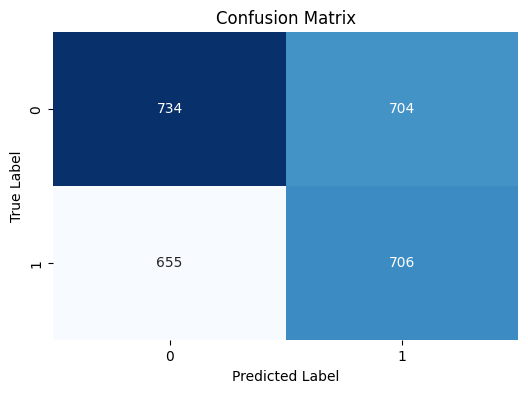

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_tf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## <b> B. Logistic Regression (with polynomial features) :</b>

In [ ]:
# Polynomial features transformation (degree 2 or 3 might perform better)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Define the Logistic Regression model with polynomial features
model = Sequential([
    Dense(1, input_shape=(X_train_poly.shape[1],), activation='sigmoid')
])

# Compile the model with tuned hyperparameters
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Deccreased learning rate
              loss='binary_crossentropy',  # Binary cross-entropy for binary classification
              metrics=['accuracy'])

# Train the model (increase epochs, and adjust batch size)
history = model.fit(X_train_poly, y_train,
                    epochs=150,              # Adjusted epochs for better convergence
                    batch_size=32,           # Experiment with smaller batch size
                    validation_data=(X_test_poly, y_test),  # Validate on test data
                    verbose=1)               # Verbose output during training

# Make predictions on the test set
y_train_pred = (model.predict(X_train_poly) > 0.5).astype("int32")  # Threshold at 0.5
y_test_pred = (model.predict(X_test_poly) > 0.5).astype("int32")



Epoch 1/150
350/350 [==============================] - 1s 2ms/step - loss: 0.9782 - accuracy: 0.4887 - val_loss: 0.9397 - val_accuracy: 0.4887
Epoch 2/150
350/350 [==============================] - 1s 2ms/step - loss: 0.9050 - accuracy: 0.4903 - val_loss: 0.8830 - val_accuracy: 0.4998
Epoch 3/150
350/350 [==============================] - 1s 2ms/step - loss: 0.8579 - accuracy: 0.4983 - val_loss: 0.8435 - val_accuracy: 0.5063
Epoch 4/150
350/350 [==============================] - 1s 2ms/step - loss: 0.8234 - accuracy: 0.5018 - val_loss: 0.8144 - val_accuracy: 0.5038
Epoch 5/150
350/350 [==============================] - 1s 2ms/step - loss: 0.7965 - accuracy: 0.5050 - val_loss: 0.7915 - val_accuracy: 0.5102
Epoch 6/150
350/350 [==============================] - 1s 2ms/step - loss: 0.7755 - accuracy: 0.5084 - val_loss: 0.7733 - val_accuracy: 0.5102
Epoch 7/150
350/350 [==============================] - 1s 2ms/step - loss: 0.7581 - accuracy: 0.5148 - val_loss: 0.7585 - val_accuracy: 0.5170

In [ ]:
# Evaluate the model using classification metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred) * 100)

print("Training Precision:", precision_score(y_train, y_train_pred))
print("Testing Precision:", precision_score(y_test, y_test_pred))

print("Training Recall:", recall_score(y_train, y_train_pred))
print("Testing Recall:", recall_score(y_test, y_test_pred))

print("Training F1 Score:", f1_score(y_train, y_train_pred))
print("Testing F1 Score:", f1_score(y_test, y_test_pred))

Training Accuracy: 61.46698829625659
Testing Accuracy: 57.8420864594498
Training Precision: 0.6132577100319035
Testing Precision: 0.5641389085754784
Training Recall: 0.6188517259881953
Testing Recall: 0.5848640705363704
Training F1 Score: 0.6160420190510104
Testing F1 Score: 0.5743145743145743


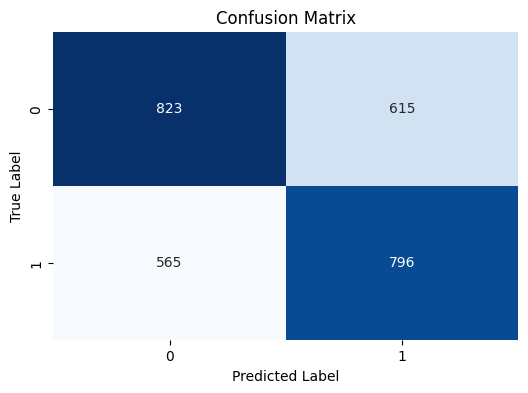

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**`Remark:`** The results obtained even after proper hyperparameter tuning and using polynomial features fail to provide acceptable train and test accuracies. This shows that the logistic regression is not suitable for the task.



---



## <b> C. Support Vector Machine :</b>

In [ ]:
# Initialize the SVM model (without regularization)
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # C=1.0 is the default value, can tune this

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the training and testing data
y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

In [ ]:
# Make predictions on the training and testing data
y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate the model using classification metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred) * 100)

print("Training Precision:", precision_score(y_train, y_train_pred))
print("Testing Precision:", precision_score(y_test, y_test_pred))

print("Training Recall:", recall_score(y_train, y_train_pred))
print("Testing Recall:", recall_score(y_test, y_test_pred))

print("Training F1 Score:", f1_score(y_train, y_train_pred))
print("Testing F1 Score:", f1_score(y_test, y_test_pred))

Training Accuracy: 50.906816760475294
Testing Accuracy: 52.69739192568774
Training Precision: 0.5094191522762951
Testing Precision: 0.5146476642913698
Training Recall: 0.4643176533714899
Testing Recall: 0.4775900073475386
Training F1 Score: 0.48582389819406757
Testing F1 Score: 0.4954268292682927


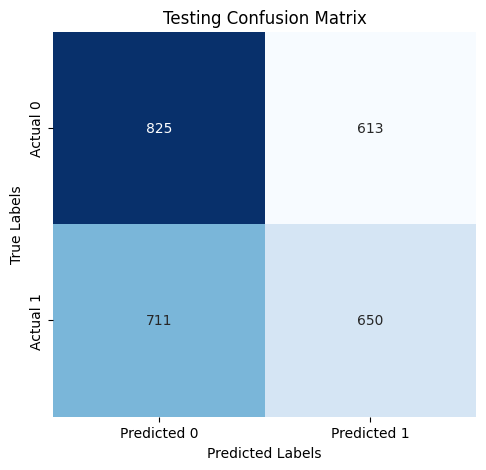

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_test_pred)

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plotting the confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plot_confusion_matrix(confusion_matrix, title='Testing Confusion Matrix')



---



## <b> D. Support Vector Machine (after hyperparameter-tuning) :</b>

In [ ]:
# Create a pipeline that scales the data and fits the SVM model
svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))

# Train the model using the training data
svm_pipeline.fit(X_train_poly, y_train)

# Make predictions on the training and testing data
y_train_pred = svm_pipeline.predict(X_train_poly)
y_test_pred = svm_pipeline.predict(X_test_poly)


In [ ]:
# Evaluate the model using classification metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred) * 100)

print("Training Precision:", precision_score(y_train, y_train_pred))
print("Testing Precision:", precision_score(y_test, y_test_pred))

print("Training Recall:", recall_score(y_train, y_train_pred))
print("Testing Recall:", recall_score(y_test, y_test_pred))

print("Training F1 Score:", f1_score(y_train, y_train_pred))
print("Testing F1 Score:", f1_score(y_test, y_test_pred))


Training Accuracy: 70.97292950951487
Testing Accuracy: 59.66416577349053
Training Precision: 0.704006968641115
Testing Precision: 0.5841799709724238
Training Recall: 0.7227687354677159
Testing Recall: 0.59147685525349
Training F1 Score: 0.7132644956314536
Testing F1 Score: 0.5878057685286601


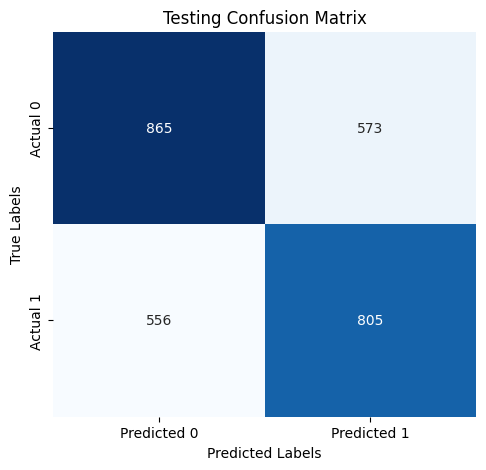

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_test_pred)

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plotting the confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plot_confusion_matrix(confusion_matrix, title='Testing Confusion Matrix')

**`Remark:`** The results obtained using SVM even after proper hyperparameter tuning and using polynomial features fail to provide acceptable train and test accuracies. SVM does not appear fit for the task.



---



## <b>E. Random Forest :</b>

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on training and testing data
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

# Generate classification reports
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Print the classification reports
print("Training Classification Report:")
print(train_report)

print("Testing Classification Report:")
print(test_report)

Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      5602
         1.0       0.94      0.93      0.93      5591

    accuracy                           0.93     11193
   macro avg       0.93      0.93      0.93     11193
weighted avg       0.93      0.93      0.93     11193

Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      1438
         1.0       0.78      0.79      0.78      1361

    accuracy                           0.79      2799
   macro avg       0.79      0.79      0.79      2799
weighted avg       0.79      0.79      0.79      2799



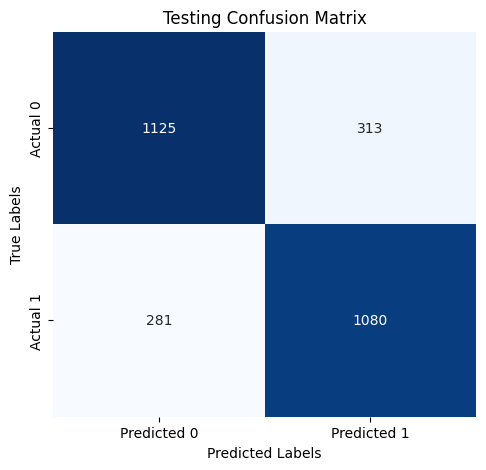

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_test_pred)

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plotting the confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plot_confusion_matrix(confusion_matrix, title='Testing Confusion Matrix')

**`Remark:`** The results obtained after proper hyperparameter tuning appear to be better than earlier models but the a better setting still seems to be required.







---



## **<b>F. XGBoost : </b>**

In [ ]:
# Install and import the XGBoost library
!pip install xgboost
import xgboost as xgb

# Initialize and train XGBoost
xgboost_model = xgb.XGBClassifier(random_state=42)
xgboost_model.fit(X_train_scaled, y_train)

# Evaluate on Training Data
y_train_pred_xgb = xgboost_model.predict(X_train_scaled)
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)

# Evaluate on Testing Data
y_pred_xgb = xgboost_model.predict(X_test_scaled)
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print train and test accuracy
print(f"Train Accuracy with XGBoost: {train_accuracy_xgb * 100:.2f}%")
print(f"Test Accuracy with XGBoost: {test_accuracy_xgb * 100:.2f}%")

# Classification report for train set
print("\nClassification Report on Train Data:")
print(classification_report(y_test, y_pred_xgb))

# Classification report for test set
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred_xgb))




NameError: name 'X_train_scaled' is not defined

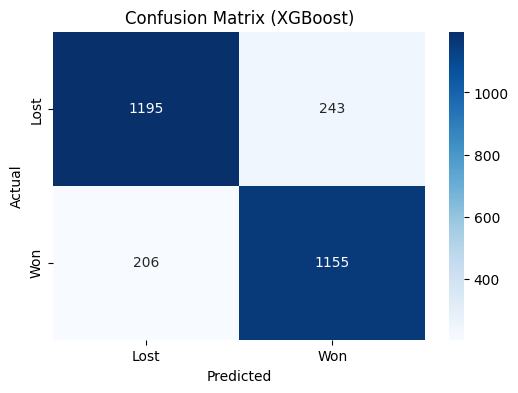

In [ ]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**`Remark:`** The results obtained using XGBoost appear to be decent. More exploration can be done to find out a better suited model.



---



## <b>G. Artifical Neural Network : </b>

In [ ]:
# Define the model
def create_model():
    model = Sequential()
    model.add(Dense(512, input_shape=(X_train_scaled.shape[1],), activation='relu'))  # Increased number of neurons
    model.add(Dense(512, activation='relu'))  # Added another hidden layer with more neurons
    model.add(Dense(256, activation='relu'))  # Added an additional hidden layer
    model.add(Dense(128, activation='relu'))  # Added another hidden layer
    model.add(Dense(64, activation='relu'))   # Added more hidden layers
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Adam optimizer
    return model

# Create and train the model
ann_model = create_model()
history = ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=1)  # Increased epochs and reduced batch size

# Predictions using ANN model
y_train_pred = (ann_model.predict(X_train_scaled) > 0.5).astype("int32")
y_test_pred = (ann_model.predict(X_test_scaled) > 0.5).astype("int32")


Epoch 1/100
700/700 [==============================] - 4s 5ms/step - loss: 0.6936 - accuracy: 0.5105 - val_loss: 0.6909 - val_accuracy: 0.5148
Epoch 2/100
700/700 [==============================] - 3s 4ms/step - loss: 0.6845 - accuracy: 0.5567 - val_loss: 0.6805 - val_accuracy: 0.5606
Epoch 3/100
700/700 [==============================] - 3s 4ms/step - loss: 0.6666 - accuracy: 0.5909 - val_loss: 0.6621 - val_accuracy: 0.5959
Epoch 4/100
700/700 [==============================] - 3s 4ms/step - loss: 0.6373 - accuracy: 0.6351 - val_loss: 0.6315 - val_accuracy: 0.6338
Epoch 5/100
700/700 [==============================] - 3s 4ms/step - loss: 0.6014 - accuracy: 0.6710 - val_loss: 0.5974 - val_accuracy: 0.6742
Epoch 6/100
700/700 [==============================] - 3s 4ms/step - loss: 0.5613 - accuracy: 0.7007 - val_loss: 0.5678 - val_accuracy: 0.6860
Epoch 7/100
700/700 [==============================] - 3s 4ms/step - loss: 0.5220 - accuracy: 0.7301 - val_loss: 0.5452 - val_accuracy: 0.7081

In [ ]:
y_train_pred = (ann_model.predict(X_train_scaled) > 0.5).astype("int32")
y_test_pred = (ann_model.predict(X_test_scaled) > 0.5).astype("int32")

# Print metrics for ANN model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred) * 100)


88/88 [==============================] - 0s 2ms/step
Training Accuracy: 88.39453229697132
Testing Accuracy: 80.20721686316541


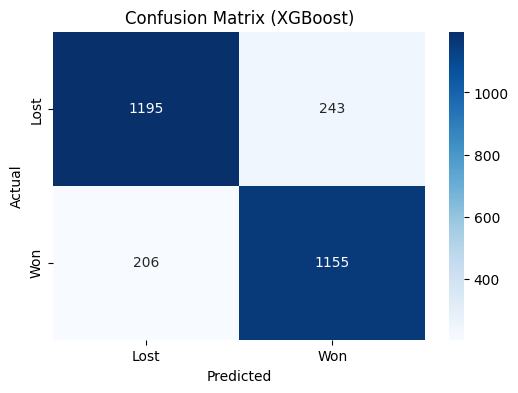

In [ ]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**`Remark:`** The results obtained using ANN appear to be decent and acceptable.



---



## <b>G. Convolutional Neural Network : </b>

In [ ]:
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))  # First Conv layer
    model.add(Conv1D(128, kernel_size=3, activation='relu'))  # Second Conv layer
    model.add(Conv1D(256, kernel_size=3, activation='relu'))  # Third Conv layer
    model.add(Flatten())  # Flatten the output from Conv layers
    model.add(Dense(128, activation='relu'))  # Dense layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Adam optimizer
    return model

# Create and train the model
cnn_model = create_cnn_model()
history = cnn_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
train_loss, train_accuracy = cnn_model.evaluate(X_train, y_train)
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)

Epoch 1/100
700/700 [==============================] - 4s 5ms/step - loss: 0.7005 - accuracy: 0.5079 - val_loss: 0.6925 - val_accuracy: 0.5102
Epoch 2/100
700/700 [==============================] - 3s 5ms/step - loss: 0.6925 - accuracy: 0.5130 - val_loss: 0.6905 - val_accuracy: 0.5245
Epoch 3/100
700/700 [==============================] - 3s 5ms/step - loss: 0.6923 - accuracy: 0.5164 - val_loss: 0.6940 - val_accuracy: 0.4816
Epoch 4/100
700/700 [==============================] - 3s 5ms/step - loss: 0.6923 - accuracy: 0.5184 - val_loss: 0.6890 - val_accuracy: 0.5402
Epoch 5/100
700/700 [==============================] - 3s 5ms/step - loss: 0.6911 - accuracy: 0.5117 - val_loss: 0.6912 - val_accuracy: 0.5088
Epoch 6/100
700/700 [==============================] - 3s 5ms/step - loss: 0.6851 - accuracy: 0.5442 - val_loss: 0.6797 - val_accuracy: 0.5570
Epoch 7/100
700/700 [==============================] - 3s 5ms/step - loss: 0.6736 - accuracy: 0.5663 - val_loss: 0.6723 - val_accuracy: 0.5763

In [ ]:
# Evaluate the model on training and testing data
train_loss, train_accuracy = cnn_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the training and testing data
y_train_pred = (cnn_model.predict(X_train) > 0.5).astype("int32")
y_test_pred = (cnn_model.predict(X_test) > 0.5).astype("int32")

# Calculate additional performance metrics
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Calculate confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)

# Print the results
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy * 100)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)
print("Training Confusion Matrix:\n", train_confusion)

print("\nTesting Loss:", test_loss)
print("Testing Accuracy:", test_accuracy * 100)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)
print("Testing Confusion Matrix:\n", test_confusion)

88/88 [==============================] - 0s 2ms/step
Training Loss: 0.2151809185743332
Training Accuracy: 88.50173950195312
Training Precision: 0.8618022864828514
Training Recall: 0.9168306206403148
Training F1 Score: 0.888465204957102
Training Confusion Matrix:
 [[4780  822]
 [ 465 5126]]

Testing Loss: 0.41204312443733215
Testing Accuracy: 80.77884912490845
Testing Precision: 0.7786052809749492
Testing Recall: 0.8449669360764144
Testing F1 Score: 0.8104298801973221
Testing Confusion Matrix:
 [[1111  327]
 [ 211 1150]]


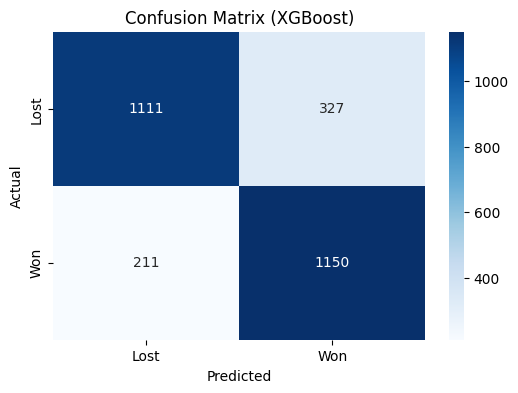

In [ ]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**`Remark:`** The results obtained using CNN appear to be decent and acceptable. The obtained results suggest that the model is neither overfit nor underfit. Therefore, can be chosen for the task.



---







# **5. Visualization of the obtained results:**

## ***Plotting to depict the importance given by the chosen model to each feature.***

In [ ]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort and plot feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance After Dropping Irrelevant Features')
plt.show()

NameError: name 'model' is not defined